In [1]:
#Task 1.0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification


warnings.filterwarnings('ignore')


In [2]:
#Task 1.1
#In prior EDA submission, I used Late_Payment column to spit the data evenly into 80/20
CCLoan = pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\Cleaned_EDA_Output.csv',header=0)
xTrainModel=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\X_Train_Output.csv',header=0)
xTestModel=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\X_Test_Output.csv',header=0)
yTrainModel=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\y_Train_Output.csv',header=0)
yTestModel=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\y_Test_Output.csv',header=0)


In [3]:
#Task 1.2
CCLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [4]:
#Task 1.2.0
xTrainModel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230633 entries, 0 to 230632
Columns: 173 entries, CLIENTID to WALLSMATERIAL_MODE_unknown
dtypes: float64(173)
memory usage: 304.4 MB


In [5]:
#Task 1.2.1
xTrainModel.head()

,CLIENTID,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1,Permutation2,Permutation3,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_unknown,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORG

In [6]:
xTrainModel.head()

,CLIENTID,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1,Permutation2,Permutation3,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_unknown,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORG

In [7]:
#Task 1.2.2
yTrainModel.head()

,LATE_PAYMENT
0,0
1,0
2,0
3,0
4,0


In [8]:
#Task 1.2.3
xTestModel.head()

,CLIENTID,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1,Permutation2,Permutation3,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_unknown,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORG

In [9]:
#Task 1.2.4
yTestModel.head()

,LATE_PAYMENT
0,0
1,0
2,0
3,1
4,0


In [10]:
#Task 1.3.1
xTrainModel.shape

(230633, 173)

In [11]:
#Task 1.3.2
yTrainModel.shape

(230633, 1)

In [12]:
#Task 1.3.3
xTestModel.shape

(76878, 173)

In [13]:
#Task 1.3.4
yTestModel.shape

(76878, 1)

In [14]:
#Task 2

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

#Logistical Regression


<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='LATE_PAYMENT'>

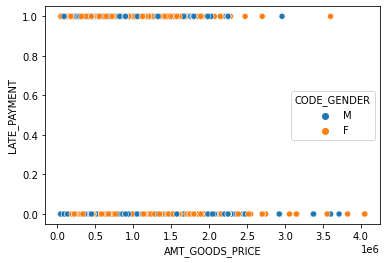

In [15]:
#Task 2.1  
#not necessary
sns.scatterplot(x ='AMT_GOODS_PRICE',y='LATE_PAYMENT',data =CCLoan,hue ='CODE_GENDER')

LOGISTIC REGRESSION

In [16]:
#Task 3.0.0
#first refrence logistic regressing example using to model
#reference  Springboard Logistic Regression Advanced Case Study

# Task A 1
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(xTrainModel, yTrainModel)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(xTrainModel), yTrainModel))#traindata 
print(accuracy_score(clf.predict(xTestModel), yTestModel))

0.9192570013831498
0.9192746949712531


In [17]:
#Task 3.1
#Task A 2
#train model while over fitting
def cv_score(clf, xTrainModel, yTrainModel, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(xTrainModel): # split data into train/test groups, 5 times
        clf.fit(xTrainModel.iloc[train], yTrainModel.iloc[train]) # fit
        result += score_func(clf.predict(xTrainModel.iloc[test]), yTrainModel.iloc[test]) # evaluate score function on held-out data
    return result / nfold # average

In [18]:
#Task 3.2
#Task A 3

clf = LogisticRegression()
score = cv_score(clf, xTrainModel, yTrainModel)
print(score)

0.9192309988191397


In [20]:
#Task 3.3
clf.coef_

array([[-1.15177230e-02,  3.43759938e-02, -1.42812878e-02,
         1.18924378e+00,  1.64009242e-01, -1.29203592e+00,
        -2.91134001e-03,  9.38586832e-02,  1.38526939e-01,
         6.84546255e-02,  3.52099367e-02, -8.99771192e-02,
         1.14528343e-01, -1.74575012e-02, -3.46407187e-02,
        -2.61328836e-03,  1.28285107e-02,  1.52790338e-02,
         1.66388455e-01, -1.41798687e-02, -2.75340002e-02,
         9.92631144e-03, -1.41708259e-02,  7.65845774e-02,
        -1.09185269e-02,  3.99265433e-02,  1.37815875e-01,
         8.11544674e-02, -1.46250523e-01,  2.31571493e-02,
         1.78721591e-01, -1.99628396e-02,  5.44295391e-02,
         6.43223054e-06, -1.26340787e-03, -1.67555721e-02,
         1.97526481e-02, -1.97526481e-02, -8.78110132e-02,
         8.78110132e-02,  9.02405689e-02, -9.02405689e-02,
         1.77554766e-03, -1.77554766e-03, -4.80444006e-03,
        -1.91679887e-03, -2.82900259e-03, -2.38651055e-03,
         5.71450831e-03, -2.14367467e-02,  1.50107843e-0

In [21]:
#Task 3.4

from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.1, 1, 10, 100]
# your turn
grid = GridSearchCV( estimator = LogisticRegression(),cv =5 ,param_grid ={'C':Cs})
grid.fit(xTrainModel, yTrainModel)
print('Train Accuracty cv=5: ' +str(accuracy_score(grid.predict(xTrainModel), yTrainModel)))

Train Accuracty cv=5: 0.9192613372761054


In [22]:
#Task 3.5
grid = GridSearchCV( estimator = LogisticRegression(),cv =10 ,param_grid ={'C':Cs})
grid.fit(xTrainModel, yTrainModel)
print('Train Accuracy cv=10: ' +str(accuracy_score(grid.predict(xTrainModel), yTrainModel)))

Train Accuracy cv=10: 0.9192613372761054


In [23]:
y_pred1 = grid.predict(xTestModel)

In [24]:
#Task 3.6

from sklearn.metrics import classification_report
print(classification_report(yTestModel, y_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70672
           1       1.00      0.00      0.00      6206

    accuracy                           0.92     76878
   macro avg       0.96      0.50      0.48     76878
weighted avg       0.93      0.92      0.88     76878



KNN Neighbor classifier

In [25]:
# Task 4.0
#take 6hr to run
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,11):  #increase range to 1-11, need to rerun all cells
    

    knn = KNeighborsClassifier(i)
    knn.fit(xTrainModel,yTrainModel)
    
    train_scores.append(knn.score(xTrainModel,yTrainModel))
    test_scores.append(knn.score(xTestModel,yTestModel))

In [26]:
# Task 4.1
print (test_scores)

[0.8552771924347667, 0.9138765316475455, 0.9034314108067327, 0.9173235516012384, 0.9143578136788157, 0.9183641613985796, 0.9174926506933063, 0.9187413824501157, 0.9183511537761128, 0.9190275501443846]


In [27]:
# Task 4.2
max(test_scores)

0.9190275501443846

In [28]:
test_scores.index(max(test_scores))

9

In [29]:
# Task 4.3

#fit model only on train model  X_train, Y_train

from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xTrainModel,yTrainModel)
knn.score(xTrainModel,yTrainModel)

0.9193870781718141

In [30]:
# Task 4.4

from sklearn.metrics import confusion_matrix
y_pred = knn.predict(xTestModel)
pl = confusion_matrix(yTestModel,y_pred)

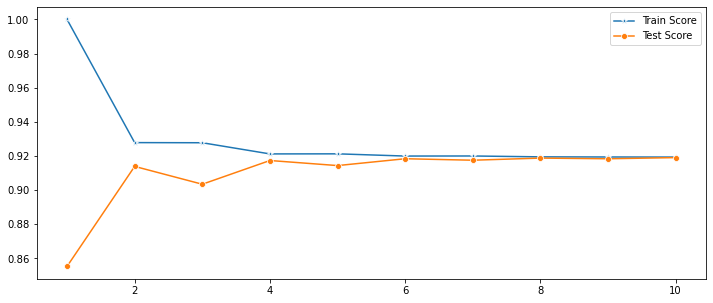

In [31]:
# Task 4.5

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,11),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,11),test_scores,marker='o',label='Test Score')

In [32]:
#Task 4.6
from sklearn.metrics import classification_report
print(classification_report(yTestModel, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70672
           1       0.13      0.00      0.00      6206

    accuracy                           0.92     76878
   macro avg       0.52      0.50      0.48     76878
weighted avg       0.86      0.92      0.88     76878



Random Forest


In [33]:
# Task 6.0

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [34]:
#Task 6.1

#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(xTrainModel)
X_train_scaled=scaler.transform(xTrainModel)
X_test_scaled=scaler.transform(xTestModel)

In [35]:
#Task 6.2

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1,class_weight= 'balanced')#verify  2 selection

model_res = clf.fit(X_train_scaled, yTrainModel)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(yTestModel, y_pred)

f1 = f1_score(yTestModel, y_pred, average='weighted')
cm = confusion_matrix(yTestModel, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.919
Random Forest: f1-score=0.881


In [36]:
#Task 6.3.0
#takes 4hr to run
n_estimators = [2,11]
max_depth = [5, 8]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [37]:
#Task 6.3.1
RF= RandomForestClassifier()
RF_cv= GridSearchCV(RF,hyperF,cv=5)
RF_cv.fit(xTrainModel,yTrainModel)
print(accuracy_score(grid.predict(xTrainModel), yTrainModel))

0.9192613372761054


In [38]:
hyperF

{'n_estimators': [2, 11],
 'max_depth': [5, 8],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2]}

In [39]:
#Task 6.4
RF_cv.best_params_


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 11}

In [40]:
#Task 6.5
yTestModel.value_counts()

LATE_PAYMENT
0               70672
1                6206
dtype: int64

In [41]:
#Task 6.6

model = GridSearchCV(estimator=RF , param_grid=hyperF,
                     scoring='roc_auc',
                     cv=9,
                     n_jobs=-1) 
RF_cv= model.fit(xTrainModel, yTrainModel)

RF_cv.best_estimator_.feature_importances_

array([1.52613153e-02, 4.57174699e-03, 1.53391580e-02, 4.04711249e-02,
       2.70548552e-02, 6.75354527e-02, 2.57231500e-02, 4.24604206e-02,
       5.11268379e-02, 2.15087226e-02, 0.00000000e+00, 1.77889915e-02,
       1.23148932e-03, 1.13717791e-03, 2.84899595e-03, 1.47281362e-03,
       6.36339174e-03, 1.52624687e-02, 5.36621842e-02, 1.46030492e-02,
       8.85685324e-04, 9.13127463e-05, 8.00166440e-04, 1.52409639e-02,
       1.50144474e-02, 1.90950741e-03, 9.08006406e-03, 1.56594506e-02,
       5.05902635e-03, 1.11952238e-02, 4.74261160e-02, 5.68654943e-03,
       8.06515219e-03, 7.75187131e-04, 1.03707105e-03, 1.57302774e-03,
       5.97921799e-03, 1.39675637e-02, 3.19602802e-02, 3.68369931e-02,
       1.67196701e-02, 4.94428029e-03, 2.30917949e-03, 1.80211396e-03,
       5.29406261e-04, 5.38099103e-04, 0.00000000e+00, 2.64150499e-04,
       7.01179551e-04, 9.73603000e-04, 2.18517035e-03, 4.13836657e-05,
       0.00000000e+00, 1.41239928e-03, 0.00000000e+00, 1.02461421e-02,
      

In [42]:
#Task 6.7
#Create confusion Matrix.  I am not sure what to use to create it


class_names=['NotLate','Late'] # name  of classes

Confusion matrix, without normalization
[[70672     0]
 [ 6205     1]]
Normalized confusion matrix
[[1.00e+00 0.00e+00]
 [1.00e+00 1.61e-04]]


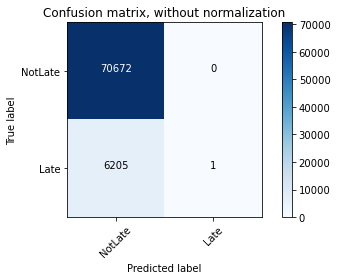

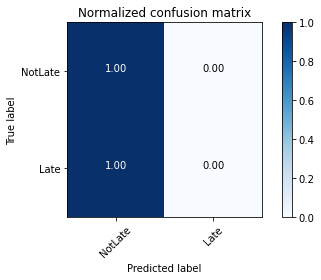

In [43]:
#Task 6.8

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(yTestModel, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

Above Confustion matrix is interesting as it does not show there are FP or TN.  If that is correct i can only summarize how many will not be late and unable to find people that will be late.    I also did not get any type 1 error and lots of type 2 errors.  

In [44]:
#Task 6.10
#recall TP / (TP+FN)

recall =70672/(70672+6206)
print('recall: ' + str(recall))


#precission  TP/(TP+FP)
precission =70672/(70672+0)
print ('precission: '+ str(precission))

#Accuracy (TP+TN)/Total
accuracy = (70672+0)/(70672+6206+0+0)
print ('accuracy: '+ str(accuracy) )

recall: 0.9192746949712531
precission: 1.0
accuracy: 0.9192746949712531


In [45]:
#Task 6.11
#F1 = 2 * (precision * recall) / (precision + recall)

F1 =2*(precission*recall)/(precission+recall)

print ('F1: '+ str(F1) )

F1: 0.9579396814639105


In modeling I used 3 different modeling methods. They were Logistic Regression, KNN-neighbor with Random Forest

Logistic Regression, I used the manual method and direct code. In this model, I get the data as having accuracy Train is 91.93% and accuracy test is 91.92. In direct code I get 91.92 train and 91.92% for test. In grid search I get the best C score from .0001.

For the KNN-neighbor, it shows the best neighbor is 9 and train score on the 92.11%. The diagram also show the point where neighbor is 9 and it matches what the score says. It is a very good visual diagram

While testing the Random forest model I can see the scores for Accuracy is very similar to the other Models. It is around 92% but the F1 score is the lowest among models I would choose model Logistic Regression Model because the accuracy and precision are at the same level on the other Models but F1 score is higher than random Forrest and Knn Neighbor. 